In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook, output_file

In [2]:
df = pd.read_csv(r"C:\Users\Anna\Desktop\Python Programs\weathermean.txt", sep='\ +', skiprows=5, header=0, engine='python')

In [3]:
# The data is sorted by month with the highest value first and the year for that value in the year column.
df.head()

,jan,year,feb,year.1,mar,year.2,apr,year.3,may,year.4,...,win,year.12,spr,year.13,sum,year.14,aut,year.15,ann,year.16
0,6.9,1916,7.5,2024,8.6,1938,11.5,2011,13.6,2024,...,6.47,2016,10.21,2024,17.10,2022,12.37,2006,10.93,2022
1,6.6,2007,7.0,1990,8.6,1957,11.0,2007,12.9,2008,...,6.23,2024,10.01,2017,17.10,2018,12.17,2011,10.89,2023
2,6.6,1921,6.9,1998,8.4,2017,10.2,2020,12.9,2018,...,6.19,2007,10.01,2011,16.94,1976,12.01,2023,10.75,2014
3,6.3,2008,6.6,1945,8.0,2012,10.2,1943,12.9,1992,...,6.09,1989,9.86,2007,16.94,2006,11.95,2022,10.57,2006
4,6.2,1975,6.6,2002,8.0,1990,9.9,2014,12.9,2017,...,5.97,2020,9.80,2014,16.86,2003,11.79,2014,10.56,2020


In [4]:
# Here we can see some missing values
df.tail()

,jan,year,feb,year.1,mar,year.2,apr,year.3,may,year.4,...,win,year.12,spr,year.13,sum,year.14,aut,year.15,ann,year.16
136,0.1,1945,-0.7,1956,2.7,1917,5.7,1891,8.7,1996,...,1.13,1940,6.43,1941,13.62,1920,7.77,1905,7.97,1887
137,-0.3,1895,-1.2,1963,2.7,1888,5.6,1908,8.7,1894,...,0.88,1947,6.31,1962,13.32,1907,7.76,1952,7.95,1963
138,-0.4,1979,-1.3,1986,2.6,2013,5.4,1986,8.6,1941,...,0.82,1895,6.18,1888,13.25,1922,7.55,1919,7.82,1888
139,-1.4,1940,-2.0,1947,2.3,1892,5.3,1922,8.4,1885,...,-0.60,1963,6.13,1887,13.22,1888,7.46,1887,7.68,1892
140,-2.3,1963,-2.2,1895,2.3,1962,4.9,1917,8.3,1902,...,---,1884,6.10,1891,---,2024,---,2024,---,2024


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jan      141 non-null    float64
 1   year     141 non-null    int64  
 2   feb      141 non-null    float64
 3   year.1   141 non-null    int64  
 4   mar      141 non-null    float64
 5   year.2   141 non-null    int64  
 6   apr      141 non-null    float64
 7   year.3   141 non-null    int64  
 8   may      141 non-null    float64
 9   year.4   141 non-null    int64  
 10  jun      141 non-null    object 
 11  year.5   141 non-null    int64  
 12  jul      141 non-null    object 
 13  year.6   141 non-null    int64  
 14  aug      141 non-null    object 
 15  year.7   141 non-null    int64  
 16  sep      141 non-null    object 
 17  year.8   141 non-null    int64  
 18  oct      141 non-null    object 
 19  year.9   141 non-null    int64  
 20  nov      141 non-null    object 
 21  year.10  141 non

In [11]:
# We are going to drop the columns which contain means for the seasons as we aren't looking at that now.
df2 = df.drop(['win', 'year.12', 'spr', 'year.13', 'sum', 'year.14', 'aut', 'year.15', 'ann', 'year.16'],axis=1)

# We also need to replace the missing values with a None value so they aren't strings.
df2 = df2.replace('---', np.nan, inplace=False)

# And look again to see changes.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jan      141 non-null    float64
 1   year     141 non-null    int64  
 2   feb      141 non-null    float64
 3   year.1   141 non-null    int64  
 4   mar      141 non-null    float64
 5   year.2   141 non-null    int64  
 6   apr      141 non-null    float64
 7   year.3   141 non-null    int64  
 8   may      141 non-null    float64
 9   year.4   141 non-null    int64  
 10  jun      140 non-null    object 
 11  year.5   141 non-null    int64  
 12  jul      140 non-null    object 
 13  year.6   141 non-null    int64  
 14  aug      140 non-null    object 
 15  year.7   141 non-null    int64  
 16  sep      140 non-null    object 
 17  year.8   141 non-null    int64  
 18  oct      140 non-null    object 
 19  year.9   141 non-null    int64  
 20  nov      140 non-null    object 
 21  year.10  141 non

In [13]:
# We need to change the shape of this data so it's easier to read. This code will set the year as index, keep months as columns
# and the temperature vill be the values.

df_jan = df2[['jan','year']].set_index('year')
df_feb = df2[['feb','year.1']].set_index('year.1')
df_mar = df2[['mar','year.2']].set_index('year.2')
df_apr = df2[['apr','year.3']].set_index('year.3')
df_may = df2[['may','year.4']].set_index('year.4')
df_jun = df2[['jun','year.5']].set_index('year.5')
df_jul = df2[['jul','year.6']].set_index('year.6')
df_aug = df2[['aug','year.7']].set_index('year.7')
df_sep = df2[['sep','year.8']].set_index('year.8')
df_oct = df2[['oct','year.9']].set_index('year.9')
df_nov = df2[['nov','year.10']].set_index('year.10')
df_dec = df2[['dec','year.11']].set_index('year.11')

#Put all of them togheter in one dataframe
new_df = df_jan.join(df_feb).join(df_mar).join(df_apr).join(df_may).join(df_jun).join(df_jul).join(df_aug).join(df_sep).join(df_oct).join(df_nov).join(df_dec)

#Sorting and resetting index
new_df.sort_index(ascending=False, inplace=True)
new_df = new_df.reset_index()

#Looking at restults
new_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2024,4.4,7.5,7.8,9.3,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4.9,6.2,6.8,8.4,12.3,16.7,16.1,16.2,16.7,12.1,7.3,6.8
2,2022,4.6,6.5,7.5,8.8,12.8,14.8,18.1,18.3,14.3,12.7,8.9,3.5
3,2021,2.9,4.8,7.0,6.2,9.9,15.3,17.5,15.8,15.8,11.8,7.3,6.1
4,2020,6.2,6.2,6.4,10.2,12.4,15.0,15.7,17.4,13.9,10.3,8.4,4.8


In [15]:
#All the months needs be transformed to floats so that all data is uniform
new_df['jun'] = new_df['jun'].astype(float)
new_df['jul'] = new_df['jul'].astype(float)
new_df['aug'] = new_df['aug'].astype(float)
new_df['sep'] = new_df['sep'].astype(float)
new_df['oct'] = new_df['oct'].astype(float)
new_df['nov'] = new_df['nov'].astype(float)
new_df['dec'] = new_df['dec'].astype(float)
new_df.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2024,4.4,7.5,7.8,9.3,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4.9,6.2,6.8,8.4,12.3,16.7,16.1,16.2,16.7,12.1,7.3,6.8
2,2022,4.6,6.5,7.5,8.8,12.8,14.8,18.1,18.3,14.3,12.7,8.9,3.5
3,2021,2.9,4.8,7.0,6.2,9.9,15.3,17.5,15.8,15.8,11.8,7.3,6.1
4,2020,6.2,6.2,6.4,10.2,12.4,15.0,15.7,17.4,13.9,10.3,8.4,4.8


In [17]:
#Making a dataframe that contains every 20 year of our data set.
every_20 = new_df[::20]
every_20.head(20)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2024,4.4,7.5,7.8,9.3,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2004,4.9,5.1,6.2,9.2,11.8,15.1,15.5,17.2,14.5,10.4,7.5,5.1
40,1984,3.3,3.2,4.3,7.5,9.3,13.9,16.1,16.9,13.2,10.7,7.7,4.9
60,1964,2.8,3.9,3.7,8.1,12.5,13.3,15.5,15.1,13.7,8.4,7.0,3.0
80,1944,5.5,3.1,4.8,9.4,10.7,13.0,15.8,16.6,12.1,8.9,5.9,3.3
100,1924,4.1,2.7,3.7,6.7,11.0,13.5,14.9,13.8,13.0,9.9,6.6,6.2
120,1904,3.5,3.0,3.9,8.4,10.3,12.9,16.5,14.7,12.2,9.4,5.0,3.6
140,1884,5.7,4.8,5.8,6.5,10.7,13.4,15.7,16.6,14.1,8.8,5.1,3.9


In [19]:
# As this will be presented as an interactive frame with Bokeh, we will change the layout of our data with melt, giving us one entry for each data point.
# This code transforms the DataFrame to long format.
df_long = pd.melt(every_20, id_vars=['year'], var_name='month', value_name='temperature')

# Making sure that we are dropping rows with Nan as they will interfere with plotting.
df_long.dropna(inplace=True)

#Converting the months to categorical datatype so they are in order
df_long['month'] = pd.Categorical(df_long['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
df_long.head()

,year,month,temperature
0,2024,jan,4.4
1,2004,jan,4.9
2,1984,jan,3.3
3,1964,jan,2.8
4,1944,jan,5.5


In [21]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 95
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         89 non-null     int64   
 1   month        89 non-null     category
 2   temperature  89 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 2.6 KB


In [35]:
#Bokeh scatter
source = ColumnDataSource(df_long)

# Choosing colour pallet:
from bokeh.palettes import RdYlGn
years = df_long['year'].unique()
palette = RdYlGn[len(years)]

# Making the figure
p = figure(title='Mean monthly temperature 1884-2024',
           x_axis_label='Month',
           y_axis_label='Temperature',
           tooltips=[('Year','@year'),('Month','@month'),('Temperature','@temperature')],
           x_range=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
          )

# Making a scatter plot
for i, year in enumerate(years):
    year_data = df_long[df_long['year']== year]
    source = ColumnDataSource(year_data)
    p.scatter(x='month', y='temperature', source=source, legend_label=str(year), color=palette[i], size=8)
    p.line(x='month', y='temperature', source=source, legend_label=str(year), color=palette[i], line_width=2)

# Add the legend
p.legend.title = 'Year'
p.legend.location = 'top_left'

show(p)

#output_file(\\cs_weathermean_plot.html") #put your path here
#save(p)

'C:\\Users\\Anna\\CS project\\cs_weathermean_plot.html'

In [ ]:
df1880ies = new_df[100::-1]

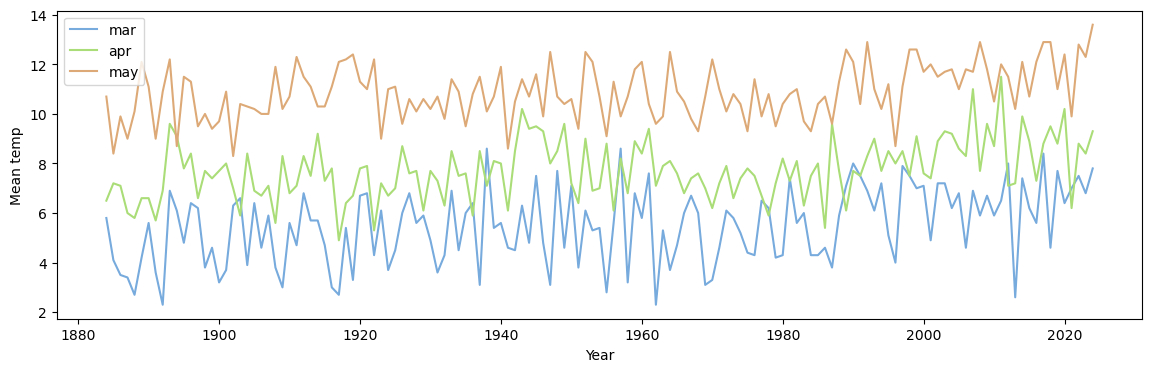

In [59]:
#Line graph for May for all of the years

all_May = new_df.plot(x='year', 
                      y=['mar','apr','may'], 
                      kind='line',
                      color=['#77aadd','#aadd77','#ddaa77'],
                      figsize=(14,4),
                      ylabel='Mean temp', 
                      xlabel='Year', 
                      );

#Move the ledgend position
all_May.legend(loc='upper left');

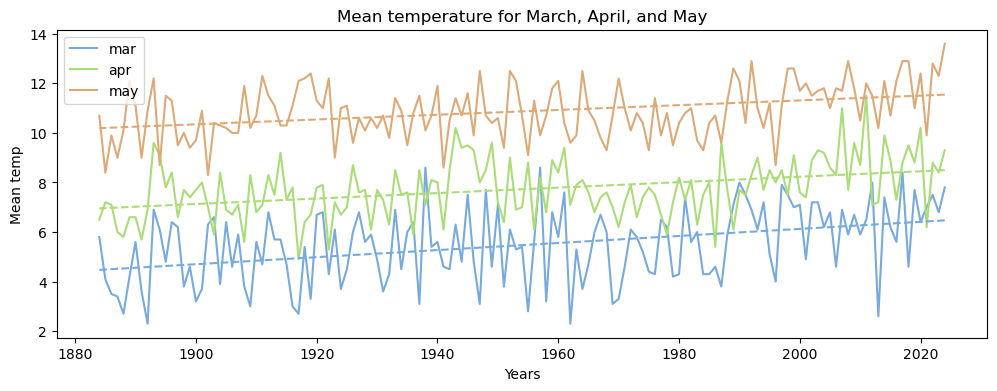

In [63]:
# Plotting for regresstion line
ax = new_df.plot(x='year', 
                 y=['mar', 'apr', 'may'], 
                 kind='line', 
                 figsize=(12, 4),
                 color=['#77aadd','#aadd77','#ddaa77'], 
                 ylabel='Mean temp', 
                 xlabel='Years')

# Calculate regression lines
months = ['mar', 'apr', 'may']
colors = ['#77aadd','#aadd77','#ddaa77']

for month, color in zip(months, colors):
    x = new_df['year']
    y = new_df[month]
    coef = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
    regression_line = np.polyval(coef, x)
    ax.plot(x, regression_line, linestyle='--', color=color)

# Customize the plot
ax.set_title('Mean temperature for March, April, and May')
ax.legend(loc='upper left');

In [65]:
#This variable contains the last ten years.
closer_may = new_df[10::-1]

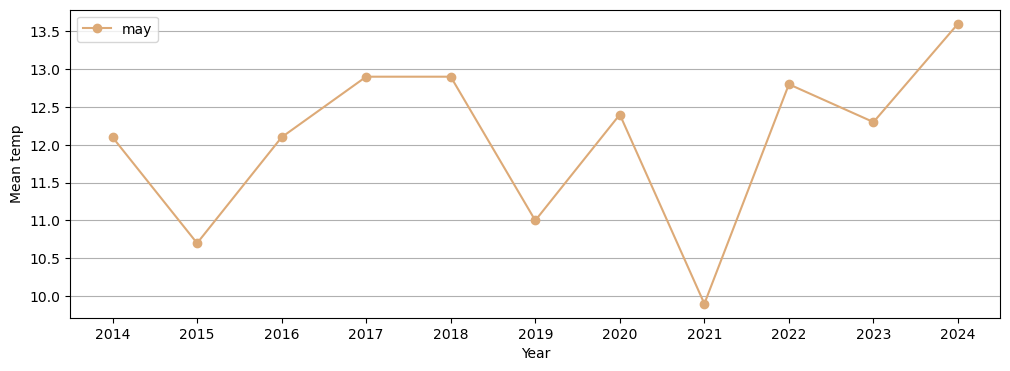

In [71]:
# scatter for May for the last 10 years, change month by changing y.

closer_may.plot(x='year', 
                y=['may'], 
                kind='line',
                color=['#ddaa77'],
                marker='o',
                xticks=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
                figsize=(12,4),
                ylabel='Mean temp', 
                xlabel='Year' 
                );
plt.grid(True, axis='y')
plt.show()